To build a model for fraud detection using the Credit Card Fraud Detection dataset, you'll first need to provide the dataset file (typically named `creditcard.csv`). You can download this dataset from the Kaggle link you provided: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).

Once you have the `creditcard.csv` file, you can use the following Python code to implement a fraud detection model. This code includes common steps for handling such a dataset, including data loading, basic exploration, preprocessing, model training, and evaluation. Given the highly imbalanced nature of fraud datasets, I've included a note about potential techniques for addressing this.

Dataset loaded successfully.

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57531 entries, 0 to 57530
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57531 non-null  int64  
 1   V1      57531 non-null  float64
 2   V2      57531 non-null  float64
 3   V3      57531 non-null  float64
 4   V4      57531 non-null  float64
 5   V5      57530 non-null  float64
 6   V6      57530 non-null  float64
 7   V7      57530 non-null  float64
 8   V8      57530 non-null  float64
 9   V9      57530 non-null  float64
 10  V10     57530 non-null  float64
 11  V11     57530 non-null  float64
 12  V12     57530 non-null  float64
 13  V13     57530 non-null  float64
 14  V14     57530 non-null  float64
 15  V15     57530 non-null  float64
 16  V16     57530 non-null  float64
 17  V17     57530 non-null  float64
 18  V18     57530 non-null  float64
 19  V19     57530 non-null  float64
 20  V20     57530 

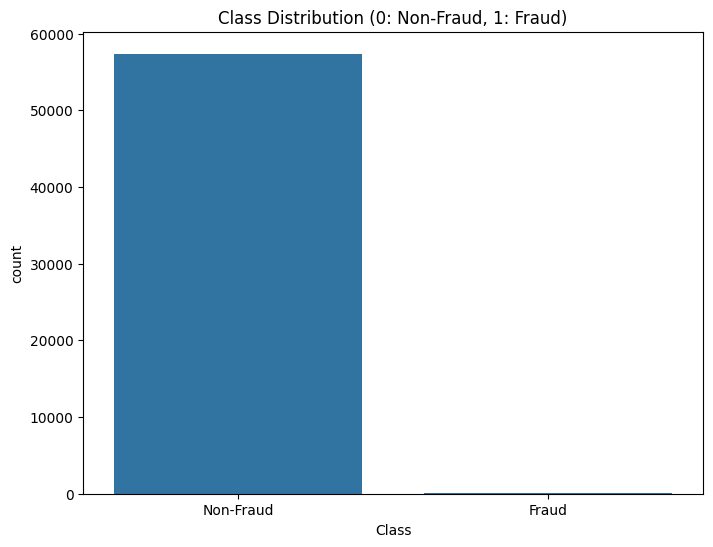


--- Distribution of Time and Amount ---


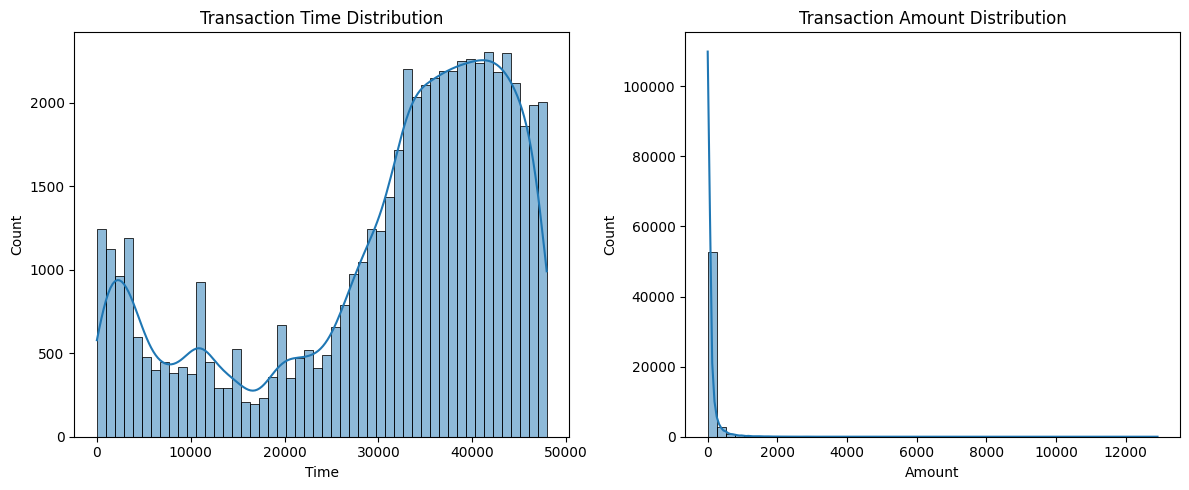


--- Data Splitting and Scaling Complete ---
X_train shape: (46024, 29), y_train shape: (46024,)
X_test shape: (11506, 29), y_test shape: (11506,)

--- Model Training ---

Training Logistic Regression...

--- Logistic Regression Performance ---
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     11474
         1.0       0.13      0.88      0.23        32

    accuracy                           0.98     11506
   macro avg       0.56      0.93      0.61     11506
weighted avg       1.00      0.98      0.99     11506

Confusion Matrix:
[[11287   187]
 [    4    28]]
ROC AUC Score: 0.9742
Precision-Recall AUC: 0.5659

Training Decision Tree Classifier...

--- Decision Tree Classifier Performance ---
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11474
         1.0       0.68      0.81      0.74        32

    accuracy                      

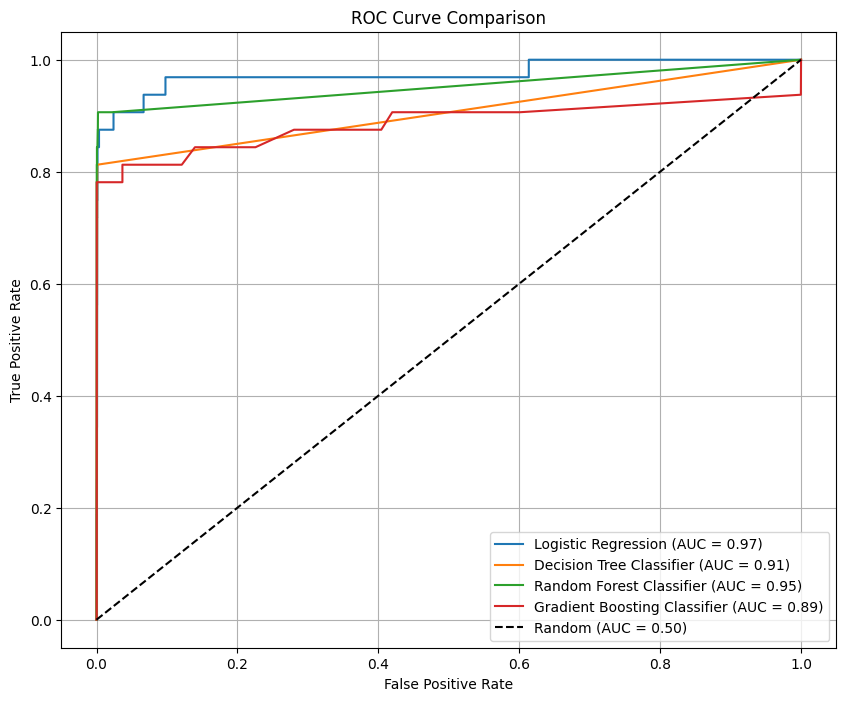

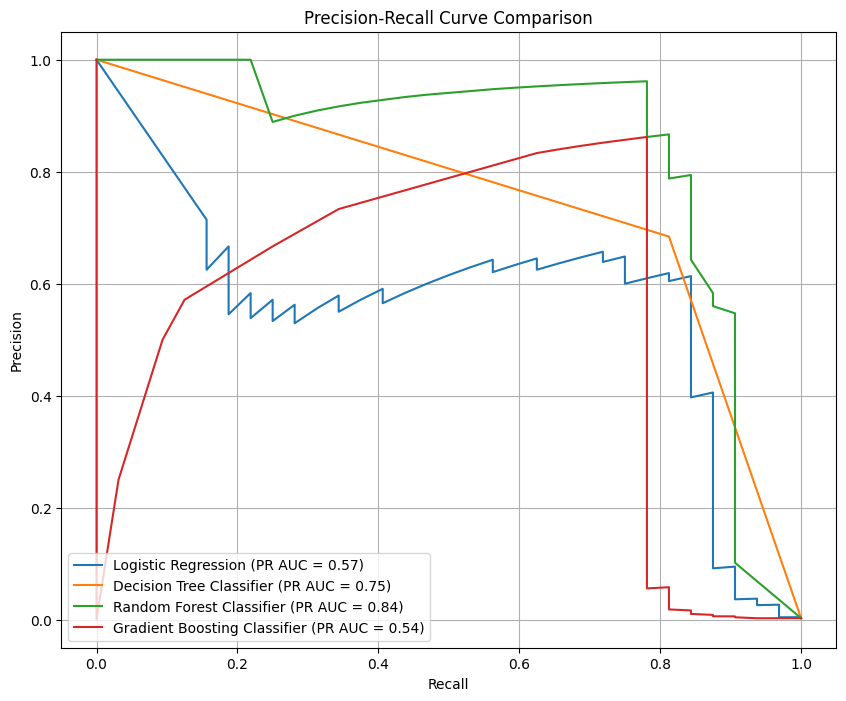

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE # You might need to install imbalanced-learn: pip install imbalanced-learn
from sklearn.metrics import roc_curve # Import roc_curve

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv('/content/creditcard.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the file is in the correct directory.")
    print("You can download it from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    exit() # Exit if the file is not found

# --- 2. Data Exploration (EDA) ---
print("\n--- Dataset Information ---")
print(df.info())
print("\n--- First 5 rows of the dataset ---")
print(df.head())
print("\n--- Class Distribution (0: Non-Fraud, 1: Fraud) ---")
print(df['Class'].value_counts())
print(f"Fraudulent transactions: {round(df['Class'].value_counts()[1]/len(df) * 100, 2)}%")

# Visualize the distribution of transactions
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.savefig('class_distribution.png')
plt.show()

# Examine 'Time' and 'Amount' features
print("\n--- Distribution of Time and Amount ---")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.tight_layout()
plt.savefig('time_amount_distribution.png')
plt.show()

# --- 3. Data Preprocessing ---

# Drop 'Time' column as it's not directly predictive for a static model
# and may introduce complexities unless handled as a time series.
df = df.drop('Time', axis=1)

# Drop rows with missing values in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']


scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Splitting and Scaling Complete ---")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train_final, y_train_final = X_train, y_train


# --- 4. Model Selection and Training ---
print("\n--- Model Training ---")

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced'),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of positive class

    # --- 5. Model Evaluation ---
    print(f"\n--- {name} Performance ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Precision-Recall Curve (more informative for imbalanced datasets)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

    results[name] = {'Accuracy': accuracy_score(y_test, y_pred),
                     'ROC_AUC': roc_auc,
                     'PR_AUC': pr_auc}

# --- Compare Model Performance ---
print("\n--- Model Performance Comparison ---")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  ROC AUC: {metrics['ROC_AUC']:.4f}")
    print(f"  PR AUC: {metrics['PR_AUC']:.4f}")

# Visualize ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC_AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_comparison.png')
plt.show()

# Visualize Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{name} (PR AUC = {results[name]["PR_AUC"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower left')
plt.grid(True)
plt.savefig('precision_recall_curve_comparison.png')
plt.show()